In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from statsmodels.formula.api import glm
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [36]:
# Load the data
train_features = pd.read_csv('dengue_features_train.csv')
train_labels = pd.read_csv('dengue_labels_train.csv')
test_features = pd.read_csv('dengue_features_test.csv')
# Merge training features and labels
df_train = train_features.merge(train_labels, on=['city', 'year', 'weekofyear'])
df_test = test_features.copy()

In [37]:
# Drop non-numeric and irrelevant columns
df_train.drop(['week_start_date'], axis=1, inplace=True, errors='ignore')
df_test.drop(['week_start_date'], axis=1, inplace=True, errors='ignore')

In [38]:
df_train.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   ndvi_ne                                1262 non-null   float64
 4   ndvi_nw                                1404 non-null   float64
 5   ndvi_se                                1434 non-null   float64
 6   ndvi_sw                                1434 non-null   float64
 7   precipitation_amt_mm                   1443 non-null   float64
 8   reanalysis_air_temp_k                  1446 non-null   float64
 9   reanalysis_avg_temp_k                  1446 non-null   float64
 10  reanalysis_dew_point_temp_k            1446 non-null   float64
 11  rean

In [40]:
df_train.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_pr

In [41]:
def missing_values_percentage(df):
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    return missing_percentage[missing_percentage > 0].sort_values(ascending=False)

# View missing values in df_train and df_test
print("Missing Values in df_train (%):")
print(missing_values_percentage(df_train))

print("\nMissing Values in df_test (%):")
print(missing_values_percentage(df_test))


Missing Values in df_train (%):
ndvi_ne                                  13.324176
ndvi_nw                                   3.571429
station_avg_temp_c                        2.953297
station_diur_temp_rng_c                   2.953297
ndvi_sw                                   1.510989
ndvi_se                                   1.510989
station_precip_mm                         1.510989
station_max_temp_c                        1.373626
station_min_temp_c                        0.961538
precipitation_amt_mm                      0.892857
reanalysis_sat_precip_amt_mm              0.892857
reanalysis_air_temp_k                     0.686813
reanalysis_relative_humidity_percent      0.686813
reanalysis_precip_amt_kg_per_m2           0.686813
reanalysis_min_air_temp_k                 0.686813
reanalysis_max_air_temp_k                 0.686813
reanalysis_dew_point_temp_k               0.686813
reanalysis_avg_temp_k                     0.686813
reanalysis_tdtr_k                         0.686813

In [42]:
# Separate by city
df_train_sj = df_train[df_train['city'] == 'sj'].copy()
df_train_iq = df_train[df_train['city'] == 'iq'].copy()
df_test_sj = df_test[df_test['city'] == 'sj'].copy()
df_test_iq = df_test[df_test['city'] == 'iq'].copy()

# Drop city column
df_train_sj.drop('city', axis=1, inplace=True)
df_train_iq.drop('city', axis=1, inplace=True)
df_test_sj.drop('city', axis=1, inplace=True)
df_test_iq.drop('city', axis=1, inplace=True)

VISUALIZATION

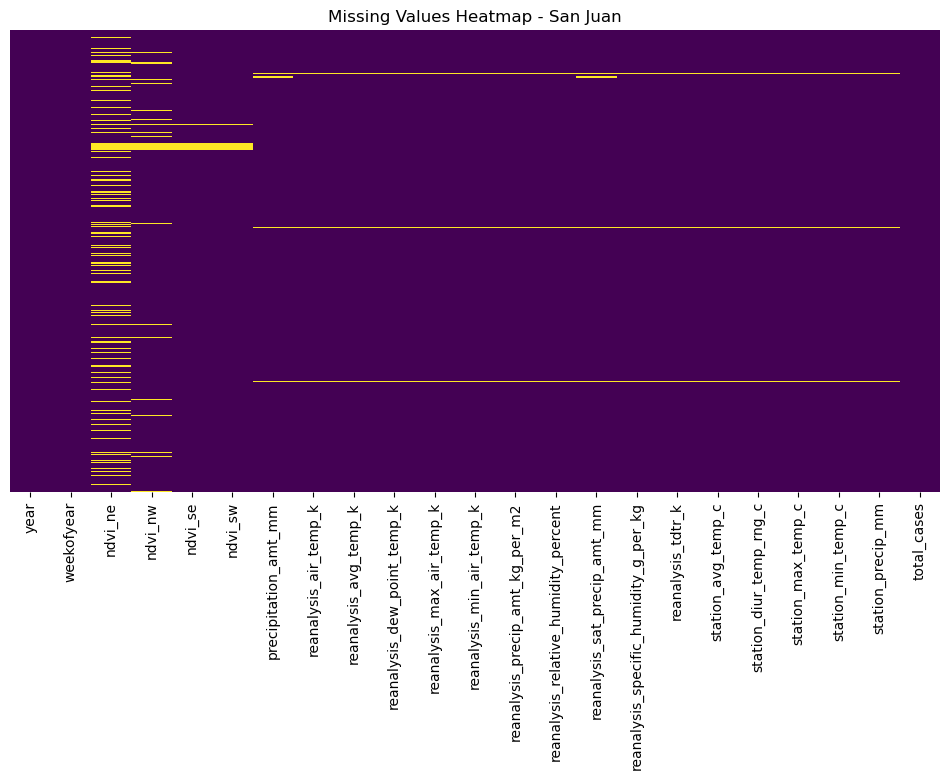

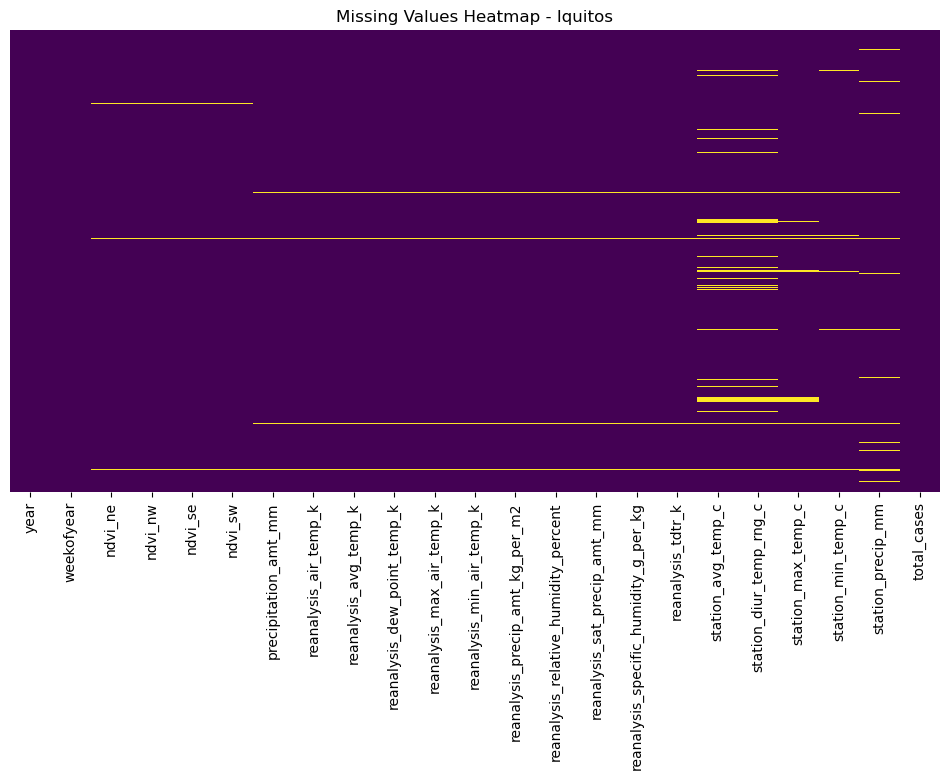

In [43]:
#Helps visualize where missing values exist
# Plot missing values heatmap for San Juan
plt.figure(figsize=(12, 6))
sns.heatmap(df_train_sj.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap - San Juan")
plt.show()

# Plot missing values heatmap for Iquitos
plt.figure(figsize=(12, 6))
sns.heatmap(df_train_iq.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap - Iquitos")
plt.show()


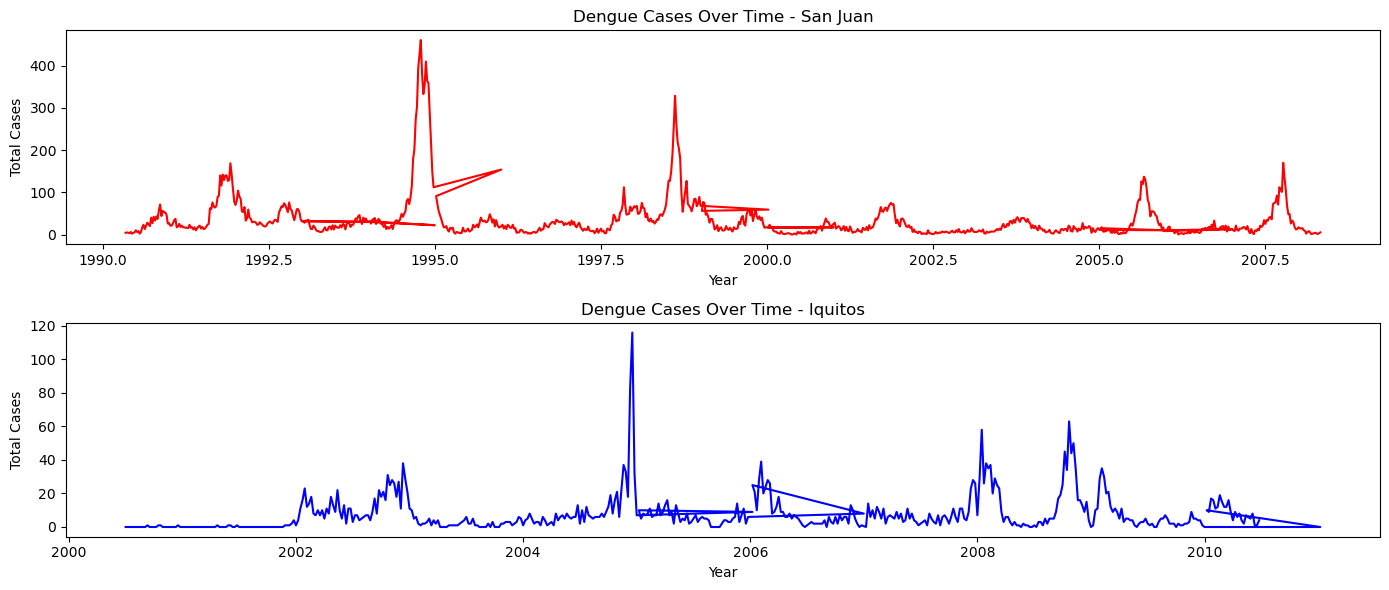

In [44]:
#Time Series Trends (Total Cases)
#Helps observe trends & seasonality in dengue cases over time.
plt.figure(figsize=(14, 6))

# Plot for San Juan
plt.subplot(2, 1, 1)
plt.plot(df_train_sj['year'] + df_train_sj['weekofyear'] / 52, df_train_sj['total_cases'], color='red')
plt.title("Dengue Cases Over Time - San Juan")
plt.xlabel("Year")
plt.ylabel("Total Cases")

# Plot for Iquitos
plt.subplot(2, 1, 2)
plt.plot(df_train_iq['year'] + df_train_iq['weekofyear'] / 52, df_train_iq['total_cases'], color='blue')
plt.title("Dengue Cases Over Time - Iquitos")
plt.xlabel("Year")
plt.ylabel("Total Cases")

plt.tight_layout()
plt.show()


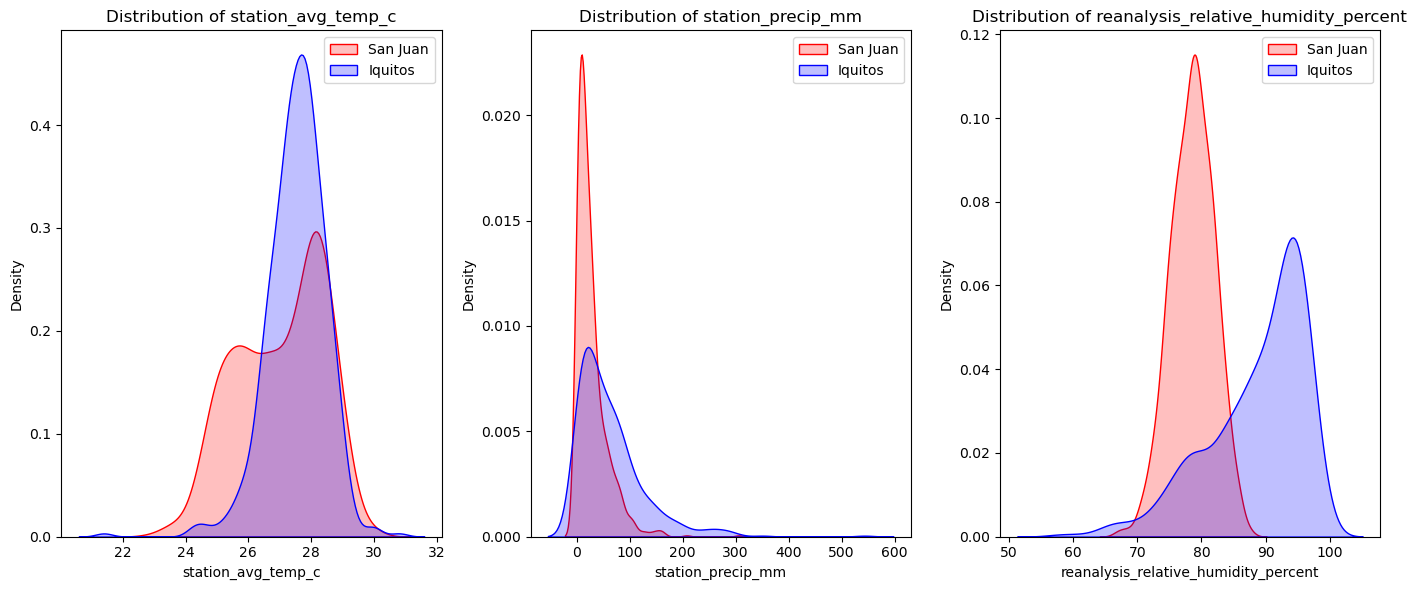

In [45]:
# Weather Feature Distributions
#Compare key climate features between San Juan & Iquito
features = ["station_avg_temp_c", "station_precip_mm", "reanalysis_relative_humidity_percent"]

plt.figure(figsize=(14, 6))

for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(df_train_sj[feature], color="red", label="San Juan", shade=True)
    sns.kdeplot(df_train_iq[feature], color="blue", label="Iquitos", shade=True)
    plt.title(f"Distribution of {feature}")
    plt.legend()

plt.tight_layout()
plt.show()


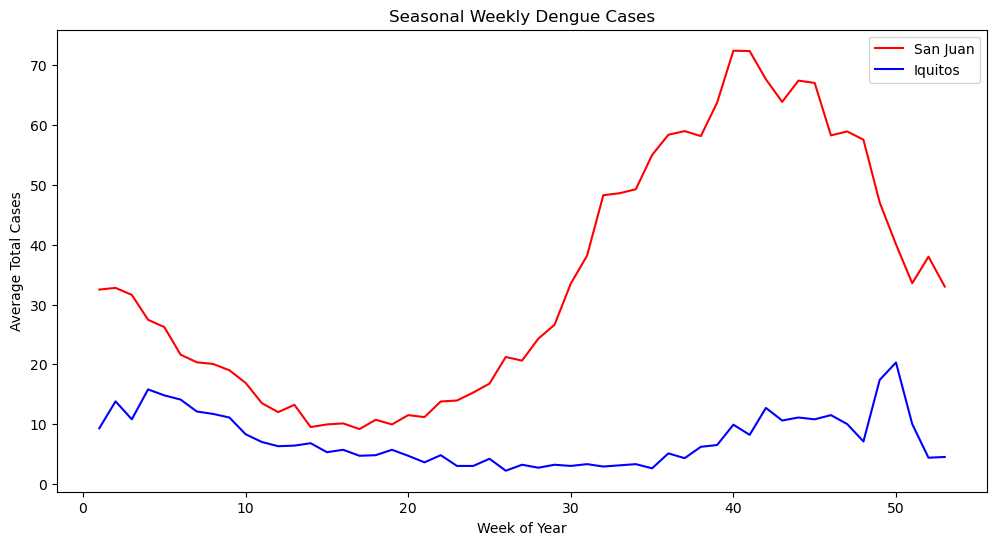

In [46]:
#Weekly Dengue Case Trends
#Find seasonal patterns across different years.
plt.figure(figsize=(12, 6))

# Group by week and take average cases
weekly_cases_sj = df_train_sj.groupby("weekofyear")["total_cases"].mean()
weekly_cases_iq = df_train_iq.groupby("weekofyear")["total_cases"].mean()

# Plot for San Juan
plt.plot(weekly_cases_sj.index, weekly_cases_sj, color="red", label="San Juan")
plt.plot(weekly_cases_iq.index, weekly_cases_iq, color="blue", label="Iquitos")

plt.xlabel("Week of Year")
plt.ylabel("Average Total Cases")
plt.title("Seasonal Weekly Dengue Cases")
plt.legend()
plt.show()


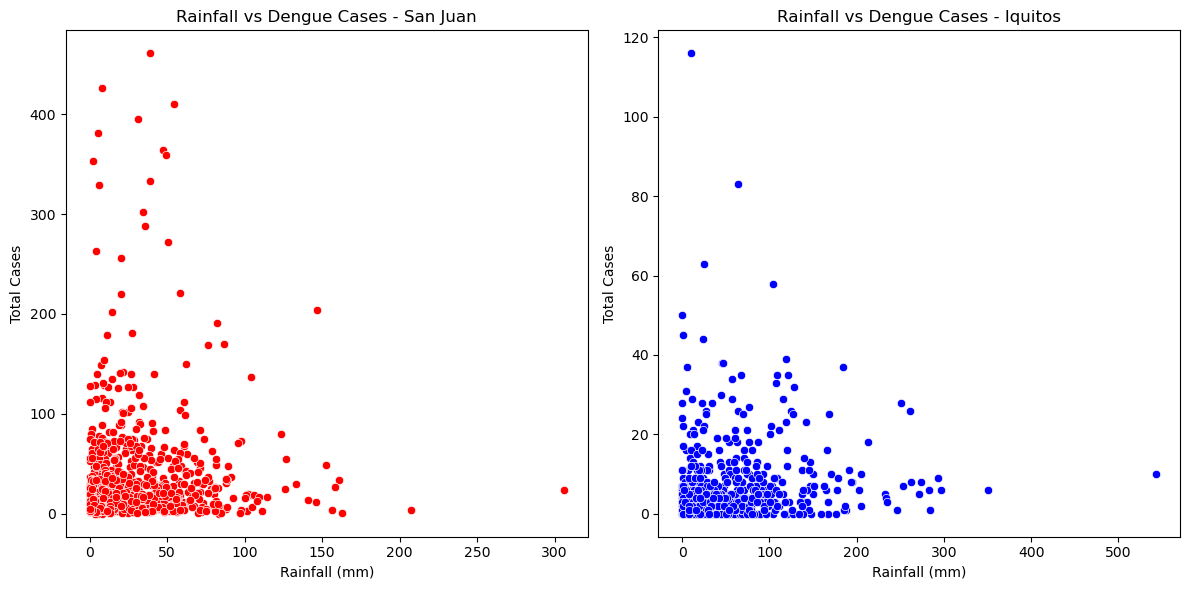

In [47]:
#Rainfall vs Dengue Cases Scatter Plot
#See if higher rainfall leads to more dengue cases.
plt.figure(figsize=(12, 6))

# San Juan scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_train_sj["station_precip_mm"], y=df_train_sj["total_cases"], color="red")
plt.title("Rainfall vs Dengue Cases - San Juan")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Total Cases")

# Iquitos scatter plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=df_train_iq["station_precip_mm"], y=df_train_iq["total_cases"], color="blue")
plt.title("Rainfall vs Dengue Cases - Iquitos")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Total Cases")

plt.tight_layout()
plt.show()


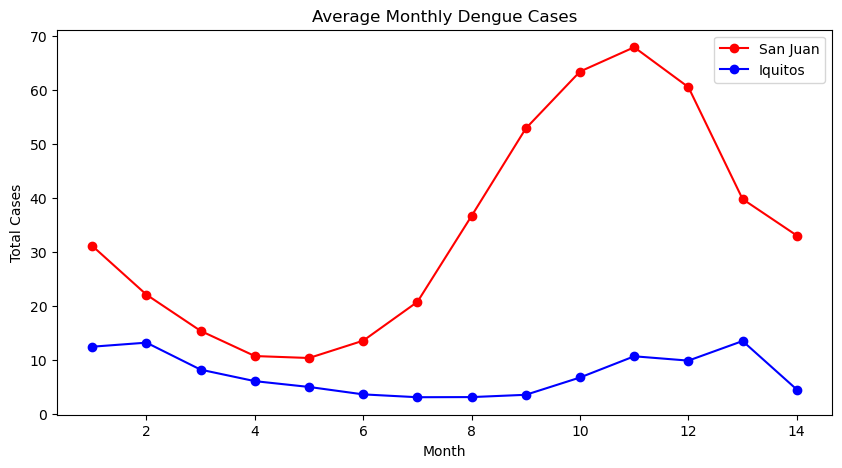

In [48]:
# Monthly Dengue Case Trends
#Why? Helps understand the seasonality of dengue cases per city.
df_train_sj['month'] = ((df_train_sj['weekofyear'] - 1) // 4) + 1
df_train_iq['month'] = ((df_train_iq['weekofyear'] - 1) // 4) + 1

monthly_cases_sj = df_train_sj.groupby('month')['total_cases'].mean()
monthly_cases_iq = df_train_iq.groupby('month')['total_cases'].mean()

plt.figure(figsize=(10, 5))
plt.plot(monthly_cases_sj.index, monthly_cases_sj, marker="o", color="red", label="San Juan")
plt.plot(monthly_cases_iq.index, monthly_cases_iq, marker="o", color="blue", label="Iquitos")
plt.title("Average Monthly Dengue Cases")
plt.xlabel("Month")
plt.ylabel("Total Cases")
plt.legend()
plt.show()


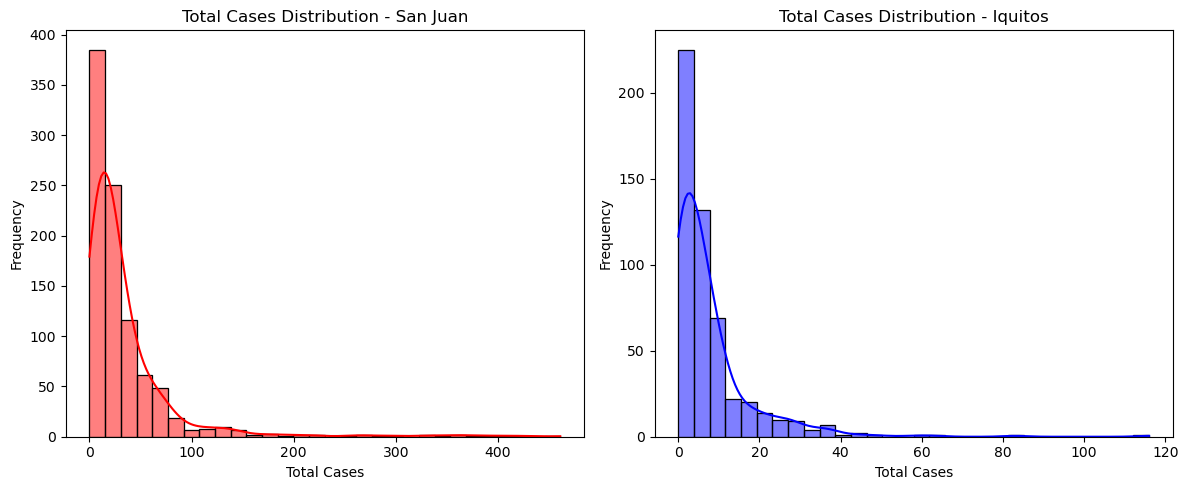

In [49]:

plt.figure(figsize=(12, 5))

# Plot for San Juan
plt.subplot(1, 2, 1)
sns.histplot(df_train_sj['total_cases'], bins=30, kde=True, color="red")
plt.title('Total Cases Distribution - San Juan')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')

# Plot for Iquitos
plt.subplot(1, 2, 2)
sns.histplot(df_train_iq['total_cases'], bins=30, kde=True, color="blue")
plt.title('Total Cases Distribution - Iquitos')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


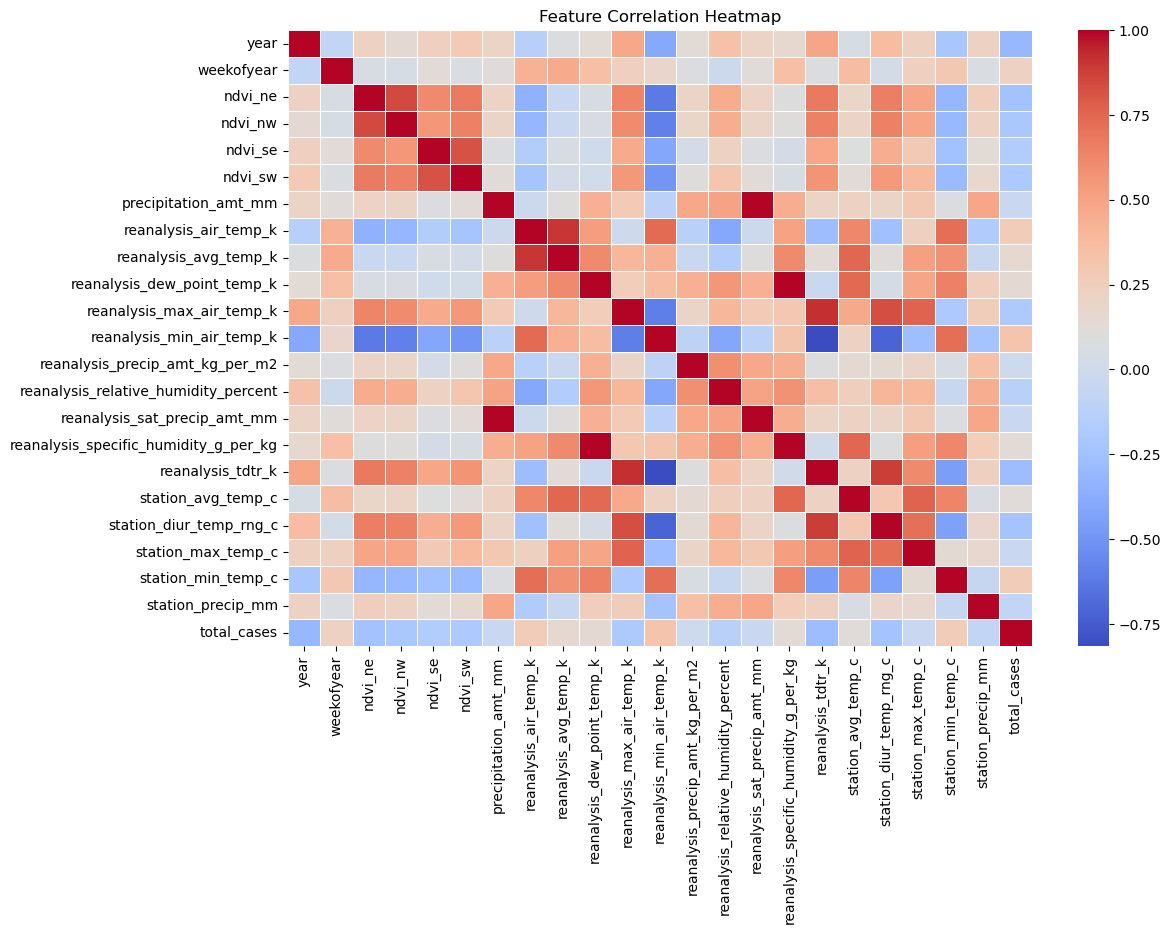

In [50]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))

# Select only numeric columns for correlation analysis
numeric_df = df_train.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


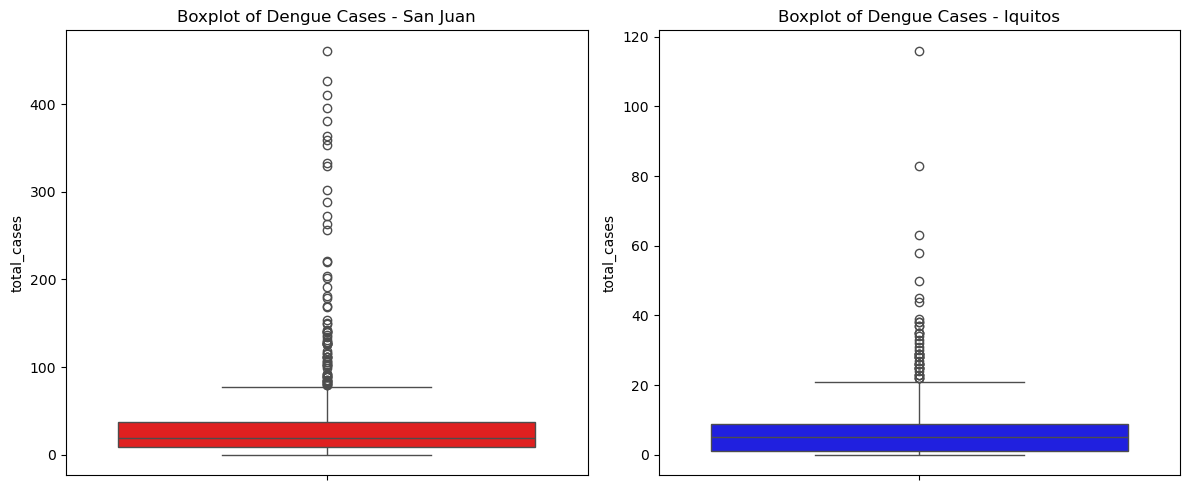

In [51]:
plt.figure(figsize=(12, 5))

# Boxplot for total cases in San Juan
plt.subplot(1, 2, 1)
sns.boxplot(y=df_train_sj["total_cases"], color="red")
plt.title("Boxplot of Dengue Cases - San Juan")

# Boxplot for total cases in Iquitos
plt.subplot(1, 2, 2)
sns.boxplot(y=df_train_iq["total_cases"], color="blue")
plt.title("Boxplot of Dengue Cases - Iquitos")

plt.tight_layout()
plt.show()


In [52]:
# Select only numeric columns for outlier removal
numeric_cols = df_train.select_dtypes(include=[np.number]).columns

Q1 = df_train[numeric_cols].quantile(0.25)
Q3 = df_train[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df_train = df_train[~((df_train[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_train[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [53]:
import pandas as pd

def process_city_data(df_train, df_test):
    # One-hot encode categorical variables
    df_train = pd.get_dummies(df_train, drop_first=True)
    df_test = pd.get_dummies(df_test, drop_first=True)

    # Ensure both datasets have the same columns
    df_test = df_test.reindex(columns=df_train.columns, fill_value=0)

    # Define correlation threshold
    correlation_threshold = 0.3

    # Compute absolute correlations with the target variable
    corr_with_target = df_train.corr().abs()['total_cases']

    # Select features with correlation above the threshold
    selected_features = corr_with_target[corr_with_target > correlation_threshold].index.tolist()

    # Ensure 'total_cases' is included in df_train
    df_train = df_train[selected_features]

    # Identify removed features
    removed_features = list(set(df_train.columns) - set(selected_features))

    # Exclude 'total_cases' from df_test
    df_test = df_test.drop(columns=['total_cases'], errors='ignore')  

    return df_train, df_test, removed_features



In [54]:
df_train_processed, df_test_processed, removed_vars = process_city_data(df_train, df_test)

print("Removed Variables:", removed_vars)


Removed Variables: []


In [55]:
# Fill missing values
df_train.fillna(method='ffill', inplace=True)
df_test.fillna(method='ffill', inplace=True)

In [56]:
# Separate features and target variable
X = df_train.drop(columns=['total_cases'])
y = df_train['total_cases']

In [57]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Standardize data
X_train_scaled = X_train.select_dtypes(include=[np.number])
X_val_scaled = X_val.select_dtypes(include=[np.number])
test_scaled = df_test.select_dtypes(include=[np.number])

# Add constant for statsmodels
X_train_scaled = sm.add_constant(X_train_scaled)
X_val_scaled = sm.add_constant(X_val_scaled)
test_scaled = sm.add_constant(test_scaled)

Training the Model

In [59]:

def calculate_metrics(y_true, y_pred, set_name):
    """
    Calculate MAE and RMSE for a given set (e.g., validation set).
    """
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"Metrics for {set_name}:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    return mae, rmse

# Train Negative Binomial Model
nb_model = sm.GLM(y_train, X_train_scaled, family=sm.families.NegativeBinomial()).fit()

# Generate predictions for the validation set
y_val_pred = nb_model.predict(X_val_scaled)
y_val_pred = np.maximum(np.round(y_val_pred).astype(int), 0)  # Ensure no negative predictions

# Calculate metrics for the validation set
mae_val, rmse_val = calculate_metrics(y_val, y_val_pred, "Validation Set")

# Generate predictions for the test set
test_predictions = nb_model.predict(test_scaled)  # Assuming X_test_scaled is correctly defined
test_predictions = np.maximum(np.round(test_predictions).astype(int), 0)  # Ensure no negative predictions

# Prepare submission file
submission = pd.DataFrame({
    'city': df_test['city'].values,
    'year': df_test['year'].values,
    'weekofyear': df_test['weekofyear'].values,
    'total_cases': test_predictions
})

submission.to_csv("submission.csv", index=False)
print("✅ Submission file saved as submission.csv")


Metrics for Validation Set:
MAE: 9.33
RMSE: 12.37
✅ Submission file saved as submission.csv
